Prepared by: Manjula Mishra

# Learning Goals

By the end of this class students will:

1. know what is logsitic regression.

2. know why logistic regression is still so poplular.

3. understand the usecases/applications of logistic regression.

4. be able to implement logistic regression in Python from scratch using SKLearn and Statsmodels. 

5. know its limitations. 

## Keywords 

Supervised learning 

Classification 

Sigmoid function 

Gradient Descent 

Loss function/Cost function 

# Sections: 

This notebook is divided into 5 different sections which covers the main idea behind the logistic regression.  

1. What is logistic regression?

2. Why is logistic regression still so poplular?

3. Applications of logistic regression

4. Implement logistic regression in Python from scratch

5. Limitations of logistic regression 

## 1. What is logistic regression? 

Logistic regression is a supervised learning method to model the relationship between a categorical outcome (dependent variable) and one or more independent variable. The independent variables or explanatory variables can be discrete and/or continuous.

The logistic function was invented in the 19TH century for the description of growth of human populations and the course of autocatalytic chemical reactions. 


Logistic regression is not a typical linear regression model. It belongs to the family of GLMs. Some of the things to notice about the logistic regression: 

1. Logistic regression does not assume a linear relationship between the dependent and independent variables. It's linear in parameters. 

2. The dependent variable must be categorical.

3. the independent variables need not be normally distributed, nor linearly related, nor of equal variance within each group, and lastly, the categories (groups) must be mutually exclusive and exhaustive. 

4. The logistic regression has the power to accommodate both categorical and continuous independent variables. 

5. Although the power of the analysis is increased if the independent variables are normally distributed and do have a linear relationship with the dependent variable.


## 2. Why is logistic regression still so poplular?


* Logistic regression is easier to implement, interpret, and very efficient to train.	

* It makes no assumptions about distributions of classes in feature space.	

* It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.	


* It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).	

* It is very fast at classifying unknown records.	

* Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.	

* It can interpret model coefficients as indicators of feature importance.	

* Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fitting in these scenarios.	

## 3. Applications of logistic regression

The logistic regression has many applications in wide variety of fields. The types of problems it deals with are of the following nature:

Binary (Pass/Fail)

Multi (Cats, Dogs, Sheep)

Ordinal (Low, Medium, High)


Some of the usecases in different business settings are: 


**Fraud detection**: Detection of credit card frauds or banking fraud is the objective of this use case.


**Email spam or ham**: Classifying the email as spam or ham and putting it in either Inbox or Spam folder is the objective of this use case.


**Sentiment Analysis**: Analyzing the sentiment using the review or tweets is the objective of this use case. Most of the brands and companies use this to increase customer experience.


**Image segmentation, recognition and classification**: The objective of all these use cases is to identify the object in the image and classify it.


**Object detection**: This use case is to detect objects and classify them not in the image but the video.
Handwriting recognition: Recognizing the letters written is the objective of this use case.


**Disease (diabetes, cancer etc.) prediction**: Predicting whether the patient has disease or not is the objective of this use case.

## Quiz 

**1. True-False: Is Logistic regression a supervised machine learning algorithm?**

A. TRUE

B. FALSE
 

**2. True-False: Is Logistic regression mainly used for Regression?**

A. TRUE

B. FALSE

**3.Logistic regression assumes a:**


A. Linear relationship between continuous predictor variables and the outcome variable.

B. Linear relationship between continuous predictor variables and the logit of the outcome variable.

C. Linear relationship between continuous predictor variables.

D. Linear relationship between observations.


**4. True-False: Is it possible to apply a logistic regression algorithm on a 3-class Classification problem?**

A. TRUE

B. FALSE


**5. Logistic regression is used when you want to:**


A. Predict a dichotomous variable from continuous or dichotomous variables.

B. Predict a continuous variable from dichotomous variables.

C. Predict any categorical variable from several other categorical variables.

D. Predict a continuous variable from dichotomous or continuous variables.


**6. In binary logistic regression:**

A. The dependent variable is continuous.

B. The dependent variable is divided into two equal subcategories.

C. The dependent variable consists of two categories.

D. There is no dependent variable.


# 4. Implement logistic regression in Python from scratch

Here, we will be implementing a basic logsitic regression model to improve our understanding of how it works. 


To acomplish that, we will be using a famous dataset called 'iris'. The description and the data can be found here: https://archive.ics.uci.edu/ml/datasets/iris. Basically, the dataset contains information (features) about three different types of flowers. We will be focusing on accuratly classifying the correct flowers. 

We wil be taking the first two features into account and two non-linearly flowers are classified as one, so leaving them as binary class. 

## Loading the data and importing the libraries

In [1]:
# let's import the important libraries we will need
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets

Although we will directly be loading a preprocessed iris data from sklearn, I wanted to you to know that the data can also be loaded like this to have a first look at the data 

In [47]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [48]:
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's load the data from sklearn and encode the target variable 0 and 1

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

# Load digits dataset
iris = sklearn.datasets.load_iris()

# Create feature matrix
X = iris.data[:, :2]

# Create target vector
y = (iris.target != 0) * 1 # so that 2 converts into 1

y
# y1 = iris.target #this will have category 2 as well that's why we use the above method
# y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
print(iris.feature_names) #column names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
print(iris.target_names) # target varieties 

['setosa' 'versicolor' 'virginica']


We will plot the 0 and 1 classes to see how it looks

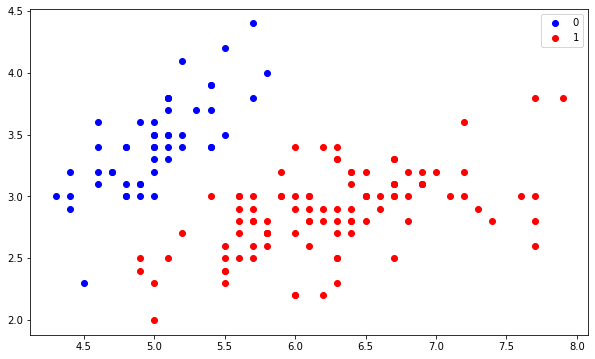

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

## Algorithm 

To iterate it once again, given a set of inputs X, our goal is to correctly identify the class (0 or 1).As we know, we will use a logistic regression model to predict the probability for each flower to know which catergory it belongs to.

### Hypothesis 

Any function takes inputs and returns the coresponding outputs. Logistic regression uses a function that generates probabilities an gives outputs between 0 and 1 for all values of X. The function that we will to achieve that is called Sigmoid function. 


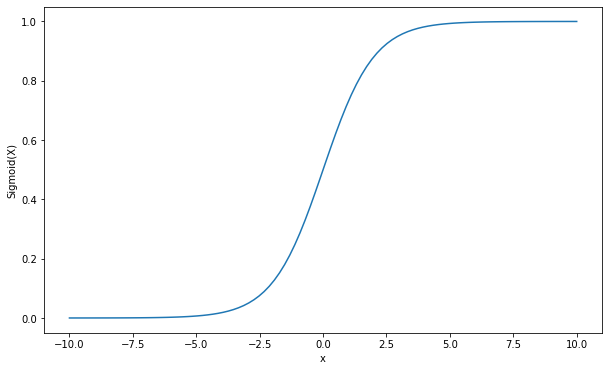

In [4]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
 
plt.figure(figsize=(10, 6))
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

### The Sigmoid function: 


\begin{equation}
\begin{array}{l}
h_{\theta}(x)=g\left(\theta^{T} x\right) \\
z=\theta^{T} x \\
g(z)=\frac{1}{1+e^{-z}}
\end{array}
\end{equation}

### Explanation 

The binary dependent variable has the values of 0 and 1 and the predicted value (probability) must be bounded to fall within the same range. To define a relationship bounded by 0 and 1, the logistic regression uses the logistic curve to represent the relationship between the independent and dependent variable. At very low levels of the independent variable, the probability approaches 0, but never reaches 0. Likewise, if the independent variable increases, the predicted values increase up the curve and approach 1 but never equal to 1.


The logistic transformation ensures that estimated values do not fall outside the range of 0 and 1. This is achieved in two steps, firstly the probability is re-stated as odds which is defined as the ratio of the probability of the event occurring to the probability of it not occurring. For example, if a horse has a probability of 0.8 of winning a race, the odds of it winning are 0.8/(1 − 0.8) = 4:1. To constrain the predicted values to within 0 and 1, the odds value can be converted back into a probability; thus,

$$
\text { Probability (event) }=\frac{\text { odds(event) }}{1+\text { odds(event) }}
$$


It can therefore be shown that the corresponding probability is 4/(1 + 4) = 0.8. Also, to keep the odds values form going below 0, which is the lower limit (there is no upper limit), the logit value which is calculated by taking the logarithm of the odds, must be computed. Odds less than 1 have a negative logit value, odds ratio greater than 1.0 have positive logit values and the odds ratio of 1.0 (corresponding to a probability of 0.5) have a logit value of 0.

Let's create a function in Python: 

In [53]:
# sigmoin function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

theta = np.zeros(X.shape[1])
z = np.dot(X, theta) 
h = sigmoid(z) 

### Loss Function 

Functions (rememeber linear regression) have weights also called parameters what we are represnting by theta in our case. The goal is to find the best value for them that can make most accurate predcitions. 

We start by picking random values. Now we need a way to measure how well the algorithm performs using the random weights that we chose. We compute this by the following loss funtion:


$$
\begin{array}{l}
h=g(X \theta) \\
J(\theta)=\frac{1}{m} \cdot\left(-y^{T} \log (h)-(1-y)^{T} \log (1-h)\right)
\end{array}
$$

In [54]:
# Let' code our loss fucntion

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### Gradient Descent

Now that we have our loss function, our goal is to minimize it by increasing/decreasing teh weights i.e. fititng them. One obvious questions is how do we know which weights should be increased or decreased or how big what parameters should be bigger or smaller? 

To achieve this, we calculate the partial derivatives of the loss function with respect to each weight. It will tell us how loss changes if we modify the parameters. 

$$
\frac{\delta J(\theta)}{\delta \theta_{j}}=\frac{1}{m} X^{T}(g(X \theta)-y)
$$

In [55]:
gradient = np.dot(X.T, (h - y)) / y.shape[0]

To update the weights, we subtract to them the derivative times the learning rate. And we do taht several times until we reach the optimal solution. 

In [56]:
lr = 0.01
theta -= lr * gradient

### predcitions

To make the predcitions, let's set our threshold (which can change depending on the business prbolem) to 0.5. If the predicted probability is >= 0.5 then it's considered class 1 vs < 0.5 belong to 0. 

In [57]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
    
    
def predict(X, theta, threshold=0.5):
    return predict_probs(X, theta) >= threshold

# Putting the code together

Now that we have already learned Logistic regression step by step, it makes sense to put it all together in one single code block. It is important for reproducibility reasons. 

Here, we are creating a class because all the other functions belong to the same class. It's a neater way to consolidate your code. 

In [5]:
 # create a class
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    # add intercept or the bias term 
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    # the sigmoid function that predcits output in terms of probabilites 
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #the loss function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    # fitting the model
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')

    # predciting the probablities for instances 
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    # output the predcited probablities 
    def predict(self, X):
        return self.predict_prob(X).round()

### Evaluation 

In [6]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X, y)

CPU times: user 10.6 s, sys: 31.2 ms, total: 10.6 s
Wall time: 10.6 s


In [65]:
preds = model.predict(X)

# accuracy
(preds == y).mean()
1.0

1.0

### Resulting Weights

In [66]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

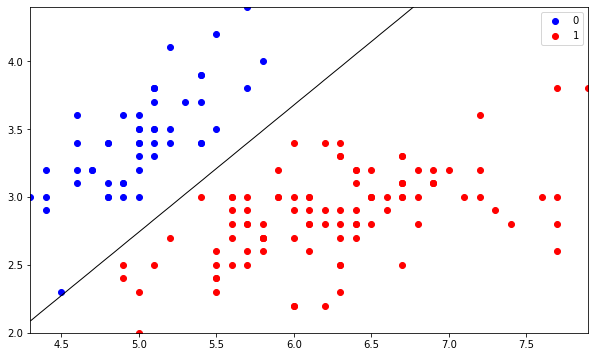

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

## Logistic Regression Using SKLearn 

## Import the relevant library 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
model = LogisticRegression(C=1e20)

In [13]:
from sklearn.datasets import load_iris
data = load_iris()
iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1 


In [14]:
model.fit(X, y)

LogisticRegression(C=1e+20)

In [15]:
model.score(X,y)

1.0

In [16]:
preds = model.predict(X)
# (preds == y).mean()

1.0

In [18]:
print(f'Train Accuracy: {accuracy_score(y, preds)}')


Train Accuracy: 1.0


In [19]:
model.intercept_, model.coef_

(array([-276.67727715]), array([[ 134.80324426, -147.37951668]]))

# Logistic Regression using Statsmodel

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

#obust standard errors essentially correct heteroskedasticity in our data
#cov_type = "HC3" is to compute robust standard error
model = sm.Logit(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                   1.000
Time:                        13:27:10   Log-Likelihood:            -7.5605e-08
converged:                      False   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 3.426e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -436.7700   5.43e+05     -0.001      0.999   -1.06e+06    1.06e+06
x1           166.7834   2.13e+05      0.001      0.999   -4.17e+0

/Users/manjulamishra/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Your Turn

1. Load the data from this url

2. Take three numerical features to predict whether a passanger survived or not by implementing Logistic regression in sklearn and Statsmodel.

3. Choose X and y.

4. Run the model and make predictions.

5. Explain your results

6. Give at least two examples of real world problems where you can use logistic regression.

### part 1: Load the data

In [19]:
#Train and test datasets

url_train = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
url_test = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"

In [ ]:
# Be mindful of missing values, you might want to drop them

In [1]:
# check the first few rows of the dataframes

### part 2: Take three numerical feature 

In [3]:
# choose three numerical variables to train the model 

### part 3. Choose X and y

In [7]:
# X matrix and y 

### part 4.  Run the model and make predictions

In [ ]:
# run the model

In [5]:
# make the predictions

### part 5. Interpret your results

In [ ]:
# How would you interpret the coefficents?


In [ ]:
# which feature are negatively related to Y?

In [6]:
# which feature are positively related to Y?

### 6. Give at least two examples of real world problems where you can use logistic regression.

In [8]:
# write down the examples where you would use logistic regression to solve the problem.



## 5. Limitations of logistic regression

* Overfitting: If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

* The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

* It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.

* Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.

* Logistic Regression requires average or no multicollinearity between independent variables.

* It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

* In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).

# Some questions to think about!


* What is overfiting? How can we solve this problem?

* What does intercept/constant term represent?

* How would you interpret coefficients?

* What if the classes are imbalanced ( the bianry classes are not equally reprenseted)?

* What acurancy metric we we use in classification problems? 

* How can we use logstic regression for multiclass problems?


## References 

https://en.wikipedia.org/wiki/Sigmoid_function

https://www.scirp.org/journal/paperinformation.aspx?paperid=95655

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.htm

https://www.quora.com/What-are-applications-of-linear-and-logistic-regression

https://papers.tinbergen.nl/02119.pdf

https://online.stat.psu.edu/stat504/node/149/. 

http://www.stat.cmu.edu/~ryantibs/advmethods/notes/glm.pdf

https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

############################################ The End ########################################################